In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

The data gives us Information about countries number of internet users , population , percentage of Internet users and their ranks according to internet users and percentage of internet users

In [ ]:
# Reading csv file with data
users = pd.read_csv('Data/List of Countries by number of Internet Users - Sheet1.csv')

# Reading the file with "worldwide geometry"
df = gpd.read_file('Data/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp')
df1 = df[['SOVEREIGNT','geometry']]
df1.rename(columns={'SOVEREIGNT':'Country or Area'}, inplace=True)

users['Population'] = users['Population'].str.replace(',', '').astype(int)
users['Internet Users'] = users['Internet Users'].str.replace(',', '').astype(int)

users['percent'] = users['Internet Users'] / users['Population'] * 100

users2 = users[['Country or Area', 'percent']].copy()

# Updating the name of some countries
users2.at[2, 'Country or Area'] = 'United States of America'
users2.at[53, 'Country or Area'] = 'United Republic of Tanzania'
users2.at[156, 'Country or Area'] = 'eSwatini'

merged = df1.merge(users2, how='left', on='Country or Area')

Text(-15, -60, '59.99% population of the World has access to Internet')

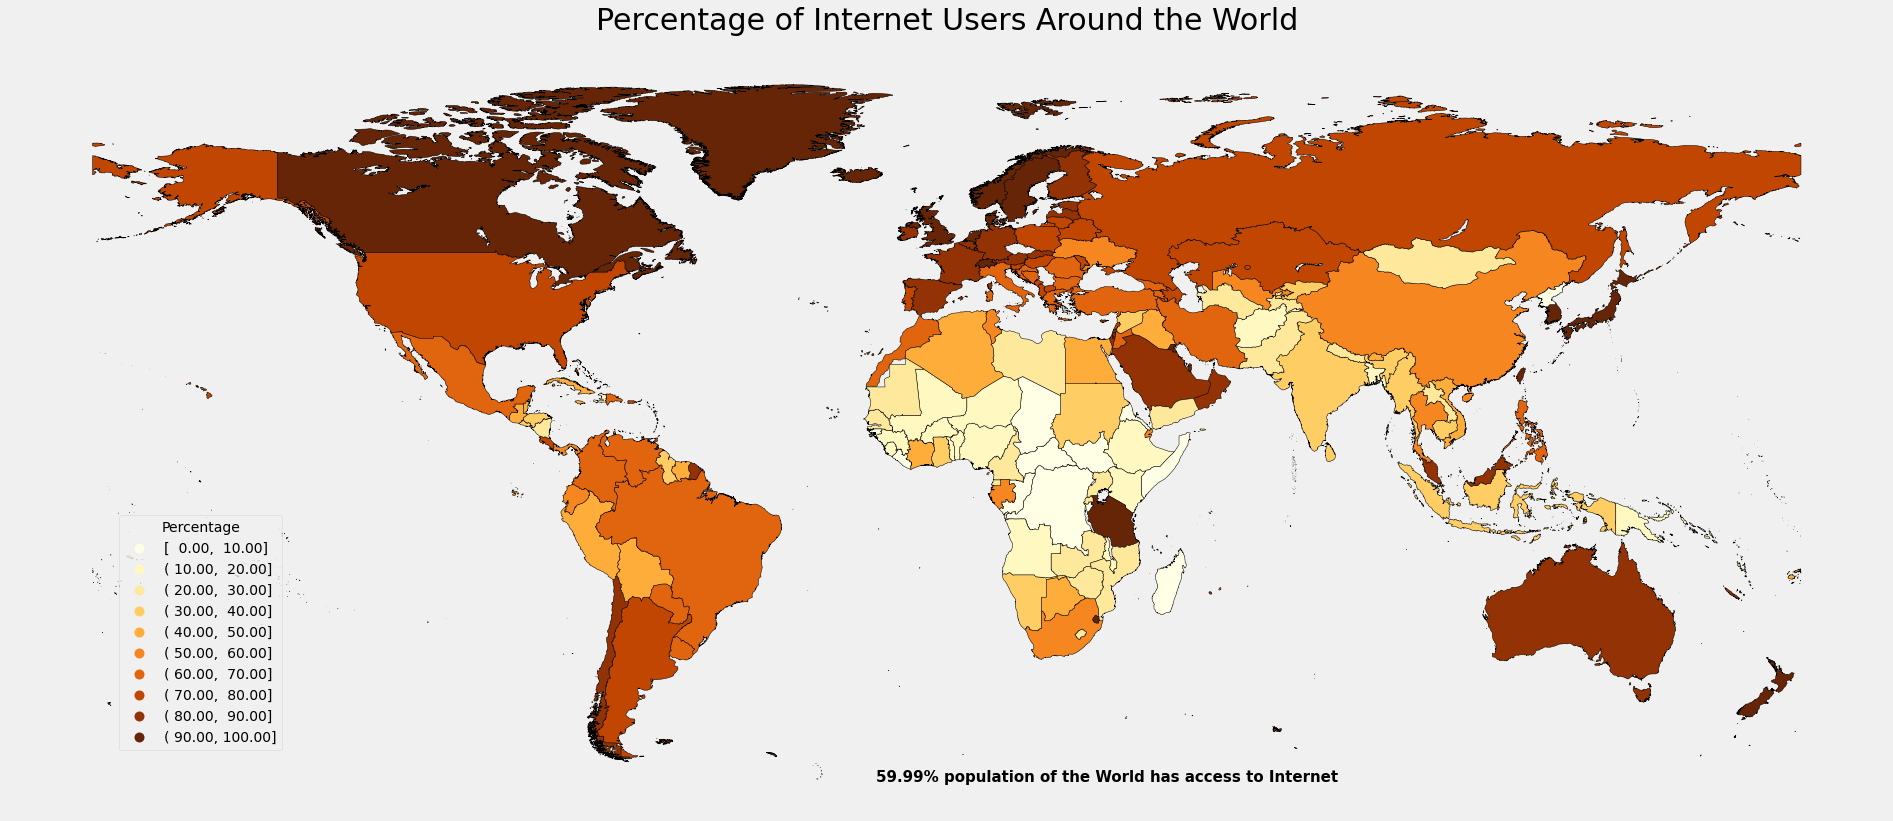

In [5]:
title = str(np.around(merged['percent'].mean(), decimals=2)) + '% population of the World has access to Internet'

cmap = 'YlOrBr'
figsize = (30, 30)

plt.style.use('fivethirtyeight')

ax = merged.dropna().plot(column='percent', cmap=cmap , figsize=figsize,
                          scheme='User_Defined',
                          classification_kwds=dict(bins=[10,20,30,40, 50, 60, 70, 80, 90, 100]),
                          edgecolor='black', legend=True)
ax.get_legend().set_bbox_to_anchor((0.15, 0.4))
ax.get_legend().set_title('Percentage')
ax.set_title("Percentage of Internet Users Around the World" , size=30, pad=20)
ax.axis('off')
ax.text(-15, -60, title, horizontalalignment='left', size=15, color='black', weight='semibold')
